In [1]:
from HTC import HTC
from HTC_plot import plotHTC

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plotter = plotHTC()

Init plotter


In [3]:
folder = 'results/connectome_998/'
mod = HTC.loadFromName(folder+'connectome_998_0.0_1.5_0.03_50_0.36_0')

CREATED Network=connectome, N=998, id=0 ...



In [8]:
mod.Trange

array([0.        , 0.00549014, 0.01098029, 0.01647043, 0.02196058,
       0.02745072, 0.03294087, 0.03843101, 0.04392116, 0.0494113 ,
       0.05490145, 0.06039159, 0.06588174, 0.07137188, 0.07686203,
       0.08235217, 0.08784232, 0.09333246, 0.09882261, 0.10431275,
       0.10980289, 0.11529304, 0.12078318, 0.12627333, 0.13176347,
       0.13725362, 0.14274376, 0.14823391, 0.15372405, 0.1592142 ,
       0.16470434, 0.17019449, 0.17568463, 0.18117478, 0.18666492,
       0.19215507, 0.19764521, 0.20313536, 0.2086255 , 0.21411564,
       0.21960579, 0.22509593, 0.23058608, 0.23607622, 0.24156637,
       0.24705651, 0.25254666, 0.2580368 , 0.26352695, 0.26901709,
       0.27450724])

In [7]:
import numpy as np
np.argmax(mod.S2_norm)
print(mod.Trange[np.argmax(mod.S2_norm)])

0.14823390784935264


Per tre valori dell'order parameter ($T<T_c$, $T=T_c$, $T>T_c$), ho plottato:
- uno sketch della time series del valore medio di attivazione
- uno sketch della time series del valore medio di attivazione per la rete normalizzata
- Power spectrum dell'attivazione
- Autocorrelation function

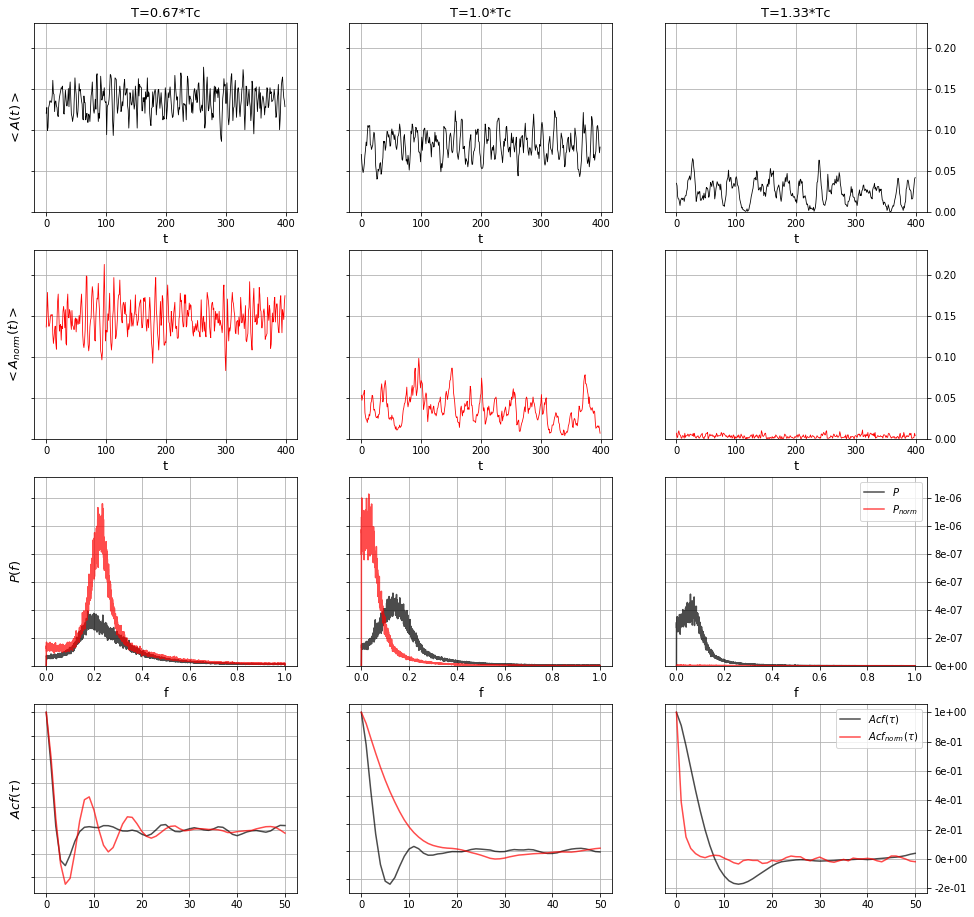

In [4]:
plotter.plot_series(mod, y_lim=[0., 0.23], N=400)

Di seguito invece ho plottato (per la rete originiale e normalizzata) al variare del parametro di soglia:
- Activity
- First and second cluster size
- Correlazione tra i nodi

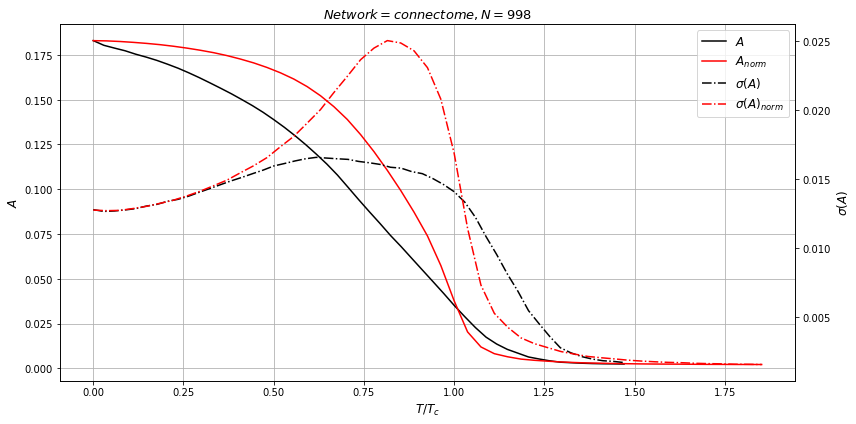

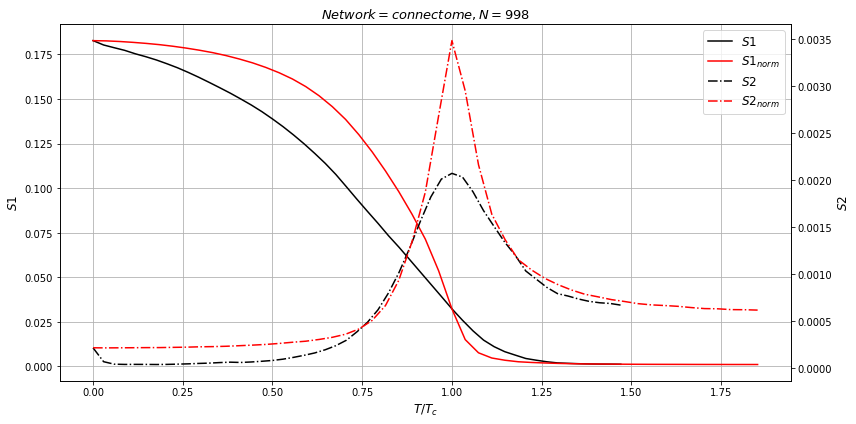

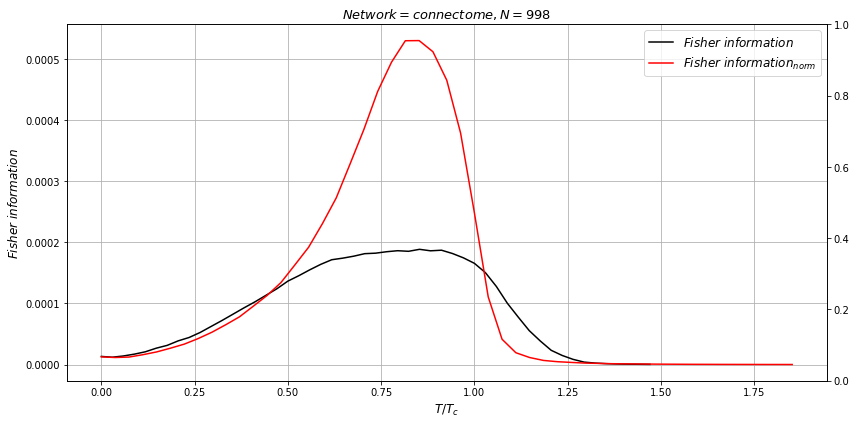

In [5]:
plotter.plot_variable(mod, 'act')
plotter.plot_variable(mod, 'cluster')
plotter.plot_variable(mod, 'fisher')

# Pdf cluster size

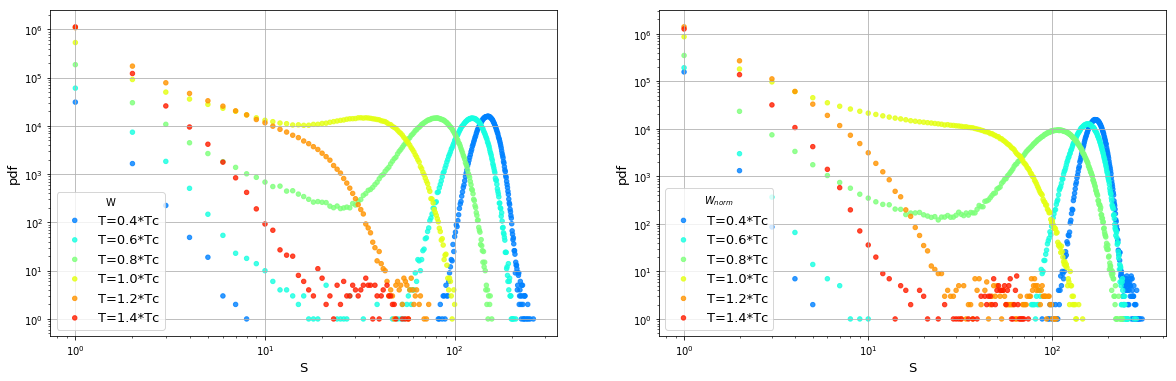

In [6]:
plotter.plot_pdf(mod, 'cluster')

# Pdf interevent time

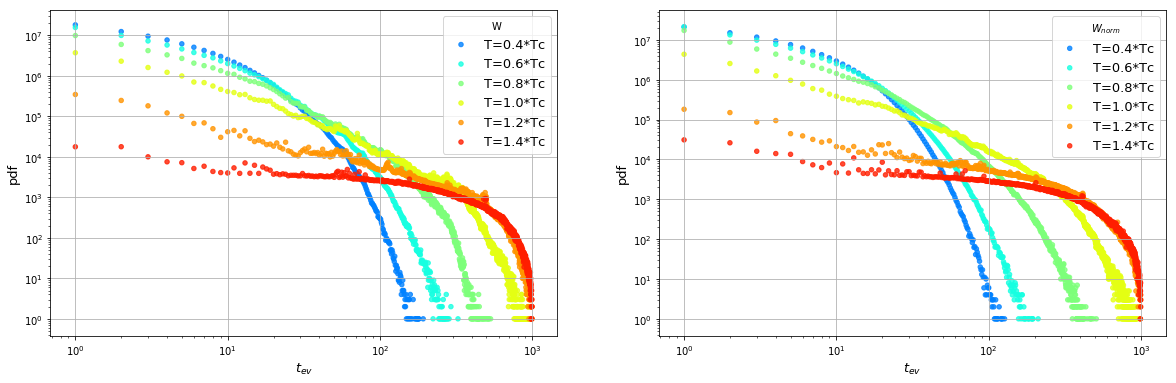

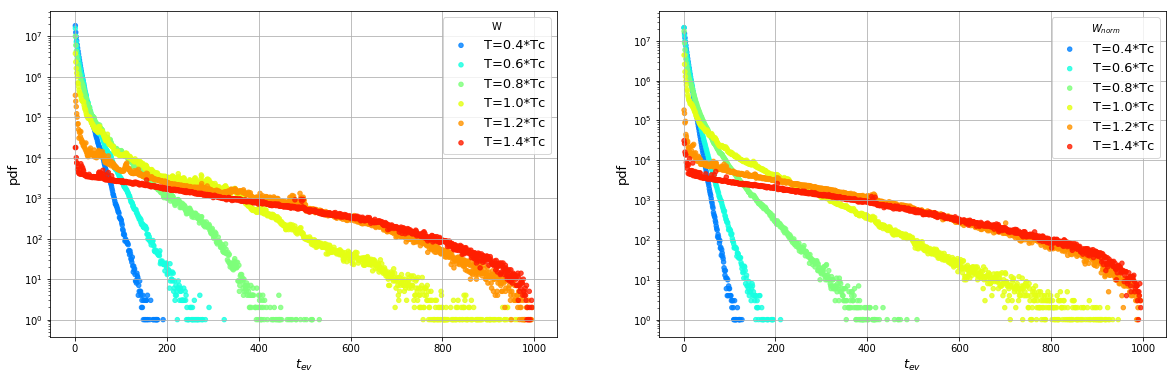

In [7]:
plotter.plot_pdf(mod, 'ev', scale='loglog')
plotter.plot_pdf(mod, 'ev', scale='log')

# Pdf avalanches

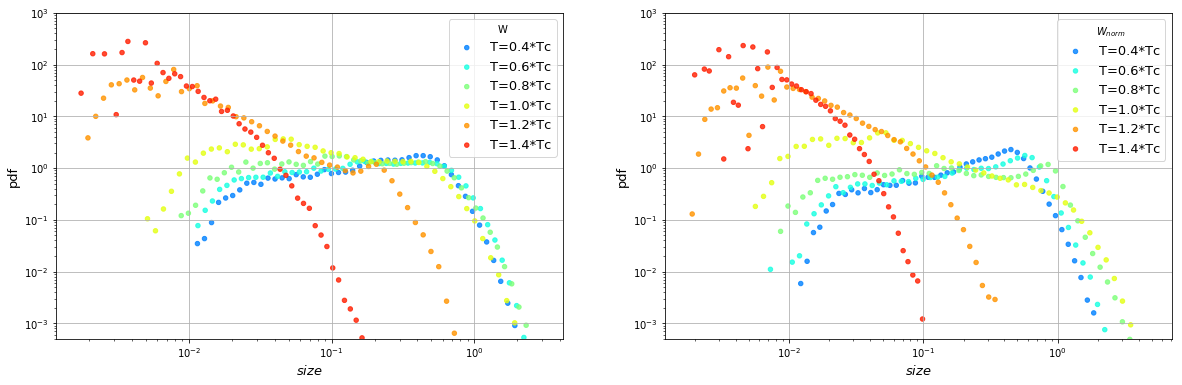

In [8]:
plotter.plot_pdf(mod, 'size', Nbins=None, yrange=[5e-4, 1e3], scale='loglog')

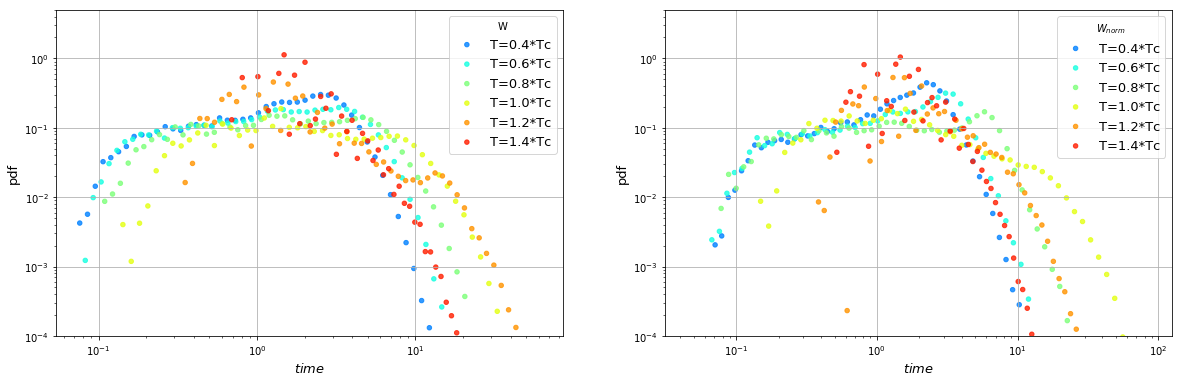

In [9]:
plotter.plot_pdf(mod, 'time', Nbins=None, yrange=[1e-4, 5e0], scale='loglog')

# Pdf causal avalanches

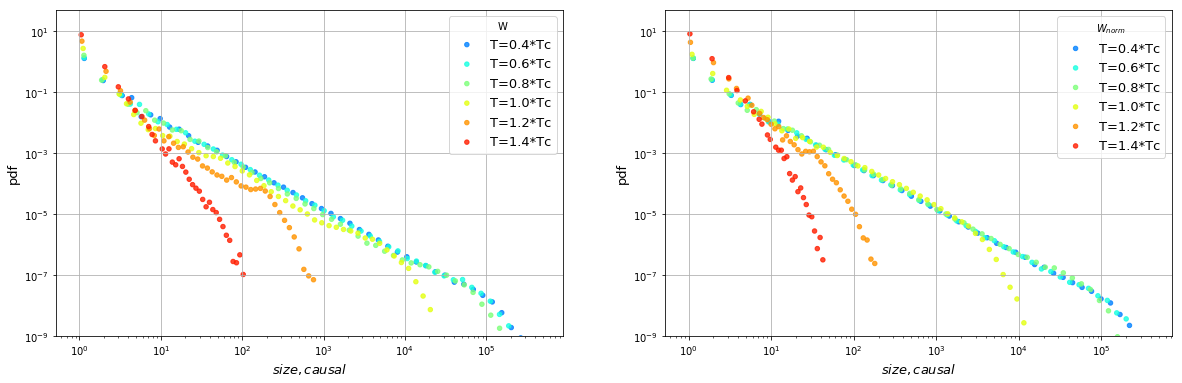

In [10]:
plotter.plot_pdf(mod, 'size_causal', Nbins=None, yrange=[1e-9, 5e1], scale='loglog')
#plotter.plot_pdf(mod, 'size_causal', Nbins=None, yrange=[1e-6, 5e2], scale='log')

-1.5074097818887353 -0.7128640646832878
-1.4000598593690687 -0.5547575284013497


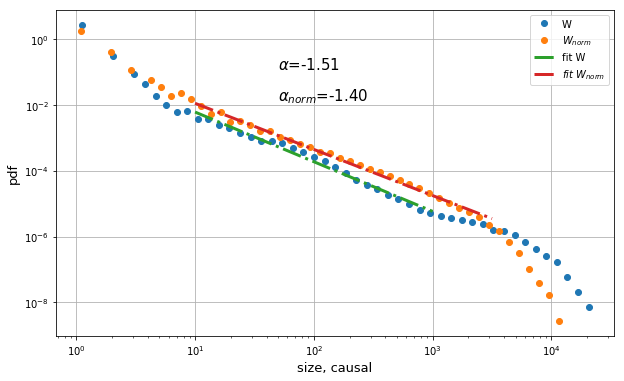

In [72]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10,6))
plt.xscale('log')
plt.yscale('log')

tt = mod.pdf_size_causal[np.argmax(mod.S2)]
tt_norm = mod.pdf_size_causal_norm[np.argmax(mod.S2_norm)]

plt.plot(tt[0], tt[1], 'o', label='W')
plt.plot(tt_norm[0], tt_norm[1], 'o', label=r'$W_{norm}$')

# Fit causal
xmin = 1
xmax = 3

x = np.log10(tt[0][tt[1]>0])
y = np.log10(tt[1][tt[1]>0])

x, y = x[(x>xmin)*(x<xmax)], y[(x>xmin)*(x<xmax)]

m, q = np.polyfit(x,y,1)
mW = m
print(m,q)
x = np.logspace(xmin, xmax)
y = 10**(m*np.log10(x) + q)

plt.plot(x,y, '-.', label='fit W', linewidth=3)

# Fit causal norm
xmin = 1
xmax = 3.5

x = np.log10(tt_norm[0][tt_norm[1]>0])
y = np.log10(tt_norm[1][tt_norm[1]>0])

x, y = x[(x>xmin)*(x<xmax)], y[(x>xmin)*(x<xmax)]

m, q = np.polyfit(x,y,1)
mWnorm = m
print(m,q)
x = np.logspace(xmin, xmax)
y = 10**(m*np.log10(x) + q)

plt.plot(x,y, '-.', label=r'$fit \ W_{norm}$', linewidth=3)

plt.text(50, 0.1, r'$\alpha$={:.2f}'.format(mW), fontsize=15, verticalalignment='bottom')
plt.text(50, 0.01, r'$\alpha_{{norm}}$={:.2f}'.format(mWnorm), fontsize=15, verticalalignment='bottom')

plt.xlabel('size, causal', size=13)
plt.ylabel('pdf', size=13)
plt.legend()
plt.grid()
plt.show()

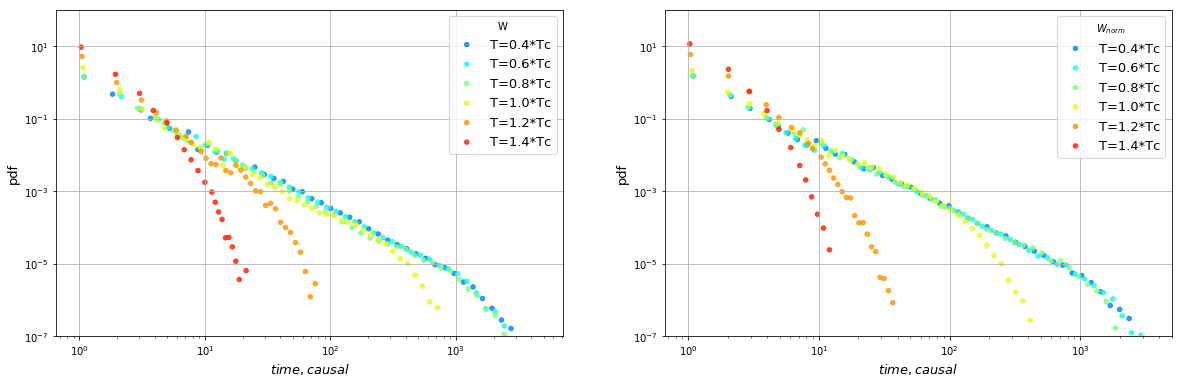

In [12]:
plotter.plot_pdf(mod, 'time_causal', Nbins=None, yrange=[1e-7, 1e2], scale='loglog')
#plotter.plot_pdf(mod, 'time_causal', Nbins=None, yrange=[1e-7, 1e2], scale='log')

-2.0493318056438823 0.2909955856652937
-1.8350784350153768 0.19543613486014386


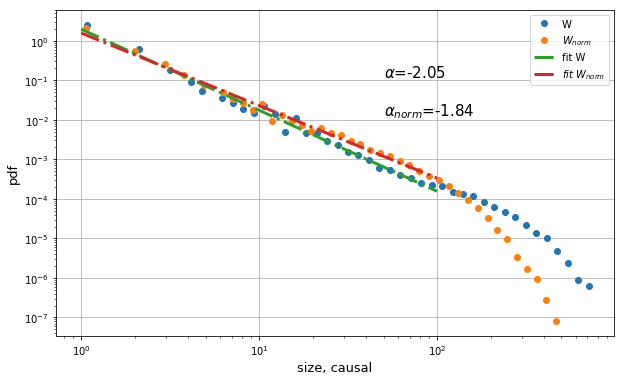

In [75]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10,6))
plt.xscale('log')
plt.yscale('log')

tt = mod.pdf_time_causal[np.argmax(mod.S2)]
tt_norm = mod.pdf_time_causal_norm[np.argmax(mod.S2_norm)]

plt.plot(tt[0], tt[1], 'o', label='W')
plt.plot(tt_norm[0], tt_norm[1], 'o', label=r'$W_{norm}$')

# Fit causal
xmin = 0
xmax = 2

x = np.log10(tt[0][tt[1]>0])
y = np.log10(tt[1][tt[1]>0])

x, y = x[(x>xmin)*(x<xmax)], y[(x>xmin)*(x<xmax)]

m, q = np.polyfit(x,y,1)
mW = m
print(m,q)
x = np.logspace(xmin, xmax)
y = 10**(m*np.log10(x) + q)

plt.plot(x,y, '-.', label='fit W', linewidth=3)

# Fit causal norm
xmin = 0
xmax = 2

x = np.log10(tt_norm[0][tt_norm[1]>0])
y = np.log10(tt_norm[1][tt_norm[1]>0])

x, y = x[(x>xmin)*(x<xmax)], y[(x>xmin)*(x<xmax)]

m, q = np.polyfit(x,y,1)
mWnorm = m
print(m,q)
x = np.logspace(xmin, xmax)
y = 10**(m*np.log10(x) + q)

plt.plot(x,y, '-.', label=r'$fit \ W_{norm}$', linewidth=3)

plt.text(50, 0.1, r'$\alpha$={:.2f}'.format(mW), fontsize=15, verticalalignment='bottom')
plt.text(50, 0.01, r'$\alpha_{{norm}}$={:.2f}'.format(mWnorm), fontsize=15, verticalalignment='bottom')

plt.xlabel('size, causal', size=13)
plt.ylabel('pdf', size=13)
plt.legend()
plt.grid()
plt.show()

# Dynamical range

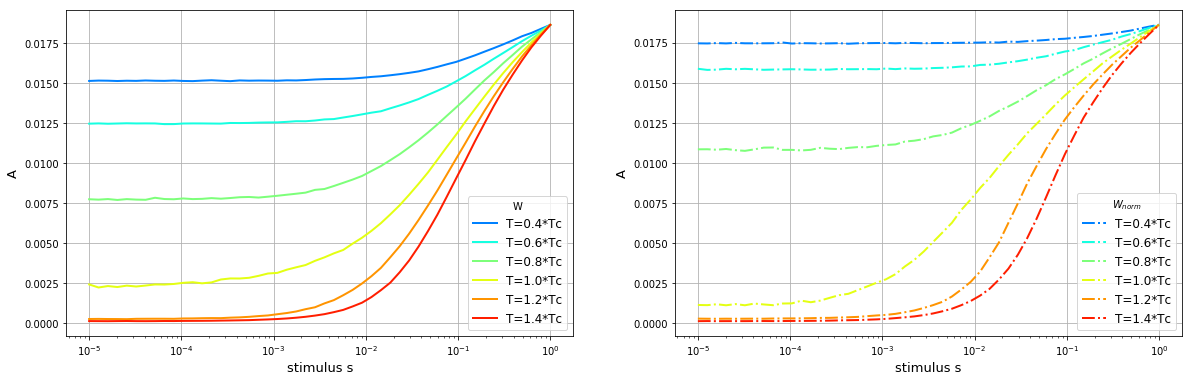

In [76]:
plotter.plot_stimulated(mod)

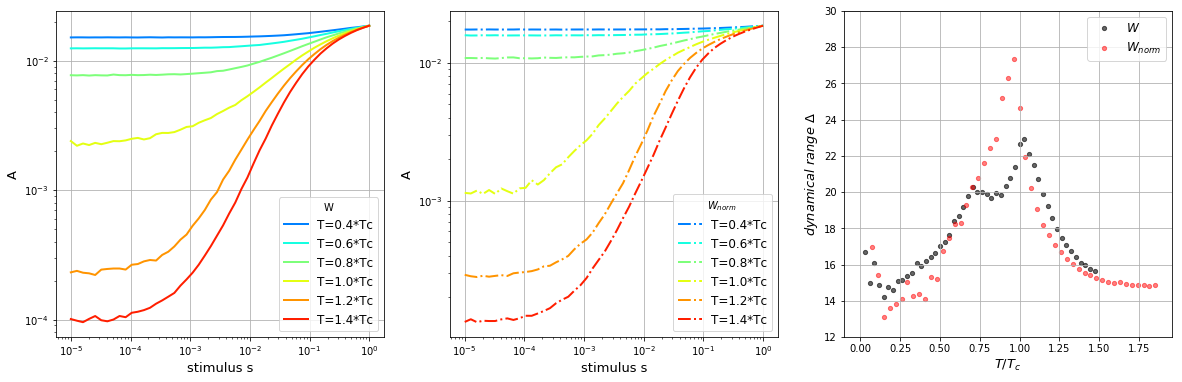

In [77]:
plotter.plot_dynamical_range(mod, ylim=[12, 30], low=0.1, high=0.9)